## <div dir=rtl>
<b><p align="justify"><font face = "IRLotus" size = "5">
ترسیم تقریب فازی از تابع اصلی و میزان خطای آن در سوال ۷-۱۰ (تابع تعلق مثلثی)
</font><br />
</div>

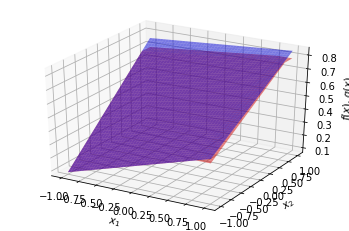

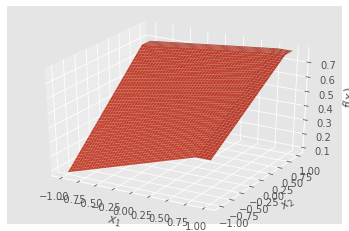

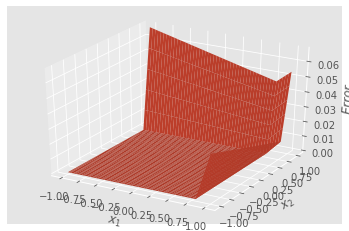

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

alpha = -1
beta = 1
x1 = np.arange(alpha, beta, 0.001)
x2 = np.arange(alpha, beta, 0.001)

g_dot_x1 = 0.1 - 0.06*x2
g_dot_x2 = 0.28 - 0.06*x1
norm_g_dot_x1 = np.linalg.norm(g_dot_x1, np.inf)
norm_g_dot_x2 = np.linalg.norm(g_dot_x2, np.inf)

epsilon = 0.1
h = epsilon/(norm_g_dot_x1 + norm_g_dot_x2)
n = round((beta-alpha)/h)
N = n+1

g_bar = np.zeros((N*N,1))
e_i1 = np.zeros((N,1))
e_i2 = np.zeros((N,1))

x1,x2 = np.meshgrid(x1,x2)

num = 0
den = 0
k = 0

def trimf(x, abc):
    return np.fmax(np.fmin((x-abc[0])/(abc[1]-abc[0]), (abc[2]-x)/(abc[2]-abc[1])), 0)

for i1 in range(1,N):
    for i2 in range(1,N):
        e_i1[i1-1,0] = -1 + h*(i1-1)
        e_i2[i2-1,0] = -1 + h*(i2-1)
        if i1==1:
            mu_A_x1 = trimf(x1, [-1,-1,-1+h])
        elif i1==N:
            mu_A_x1 = trimf(x1,[1-h, 1, 1])
        else:
            mu_A_x1 = trimf(x1,[-1+h*(i1-2), -1+h*(i1-1), -1+h*(i1)])

        if i2==1:
            mu_A_x2 = trimf(x2, [-1,-1,-1+h])
        elif i2==N:
            mu_A_x2 = trimf(x2,[1-h, 1, 1])
        else:
            mu_A_x2 = trimf(x2,[-1+h*(i2-2), -1+h*(i2-1), -1+h*(i2)])

        g_bar[k,0] = 0.52 + 0.1*e_i1[i1-1,0] + 0.28*e_i2[i2-1,0] - 0.06*e_i1[i1-1,0]*e_i2[i2-1,0]
        num = num + g_bar[k,0]*mu_A_x1*mu_A_x2
        den=den+mu_A_x1*mu_A_x2
        k=k+1
        
f_x = num/den
g_x = 0.52 + 0.1*x1 + 0.28*x2 - 0.06*x1*x2

fig = plt.figure(0)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, x2, f_x, color='r')
ax.plot_surface(x1, x2, g_x, color='b')
ax.collections[0].set_alpha(0.5)
ax.collections[1].set_alpha(0.5)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x)$, $g(x)$')
plt.savefig('fuzzy7.svg')
plt.show()

fig = plt.figure(1)
plt.style.use('ggplot')
ax = fig.gca(projection='3d')
ax.plot_surface(x1, x2, f_x, linewidth=0, antialiased=True)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x)$')
plt.savefig('fuzzy8.svg')
plt.show()

fig = plt.figure(2)
plt.style.use('ggplot')
ax = fig.gca(projection='3d')
E = g_x - f_x
surf = ax.plot_surface(x1, x2, E, linewidth=0, antialiased=True)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$Error$')
plt.savefig('fuzzy9.svg')
plt.show()

## <div dir=rtl>
<b><p align="justify"><font face = "IRLotus" size = "5">
ترسیم تقریب فازی از تابع اصلی و میزان خطای آن در سوال ۷-۱۰ (تابع تعلق گاوسی)
</font><br />
</div>

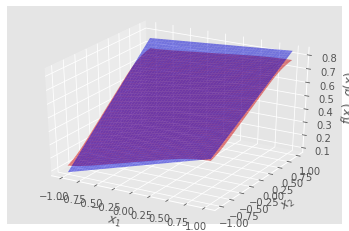

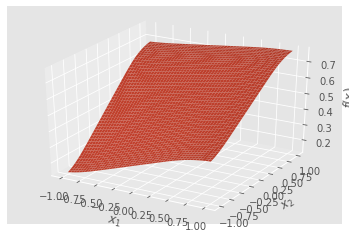

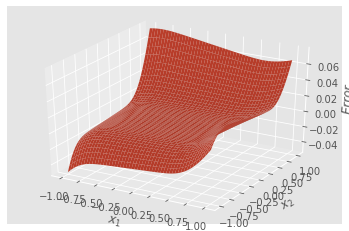

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

alpha = -1
beta = 1
x1 = np.arange(alpha, beta, 0.001)
x2 = np.arange(alpha, beta, 0.001)

g_dot_x1 = 0.1 - 0.06 * x2
g_dot_x2 = 0.28 - 0.06 * x1
norm_g_dot_x1 = np.linalg.norm(g_dot_x1, np.inf)
norm_g_dot_x2 = np.linalg.norm(g_dot_x2, np.inf)

epsilon = 0.1
h = epsilon / (norm_g_dot_x1 + norm_g_dot_x2)
n = round((beta - alpha) / h)
N = n + 1

g_bar = np.zeros((N * N, 1))
e_i1 = np.zeros((N, 1))
e_i2 = np.zeros((N, 1))

x1, x2 = np.meshgrid(x1, x2)

num = 0
den = 0
k = 0

def gaussmf(x, abc):
    return np.exp(-((x - abc[1]) / abc[0]) ** 2 / 2)


for i1 in range(1, N):
    for i2 in range(1, N):
        e_i1[i1 - 1, 0] = -1 + h * (i1 - 1)
        e_i2[i2 - 1, 0] = -1 + h * (i2 - 1)
        if i1 == 1:
            mu_A_x1 = gaussmf(x1, [h, -1])
        elif i1 == N:
            mu_A_x1 = gaussmf(x1, [h, 1])
        else:
            mu_A_x1 = gaussmf(x1, [h, -1 + h * (i1 - 1)])

        if i2 == 1:
            mu_A_x2 = gaussmf(x2, [h, -1])
        elif i2 == N:
            mu_A_x2 = gaussmf(x2, [h, 1])
        else:
            mu_A_x2 = gaussmf(x2, [h, -1 + h * (i2 - 1)])

        g_bar[k, 0] = 0.52 + 0.1 * e_i1[i1 - 1, 0] + 0.28 * e_i2[i2 - 1, 0] - 0.06 * e_i1[i1 - 1, 0] * e_i2[i2 - 1, 0]
        num = num + g_bar[k, 0] * mu_A_x1 * mu_A_x2
        den = den + mu_A_x1 * mu_A_x2
        k = k + 1

f_x = num / den
g_x = 0.52 + 0.1 * x1 + 0.28 * x2 - 0.06 * x1 * x2

fig = plt.figure(0)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, x2, f_x, color='r')
ax.plot_surface(x1, x2, g_x, color='b')
ax.collections[0].set_alpha(0.5)
ax.collections[1].set_alpha(0.5)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x)$, $g(x)$')
plt.savefig('fuzzy10.svg')
plt.show()

fig = plt.figure(1)
plt.style.use('ggplot')
ax = fig.gca(projection='3d')
ax.plot_surface(x1, x2, f_x, linewidth=0, antialiased=True)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x)$')
plt.savefig('fuzzy11.svg')
plt.show()

fig = plt.figure(2)
plt.style.use('ggplot')
ax = fig.gca(projection='3d')
E = g_x - f_x
surf = ax.plot_surface(x1, x2, E, linewidth=0, antialiased=True)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$Error$')
plt.savefig('fuzzy12.svg')
plt.show()